In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import importlib
from tqdm import tqdm
import seaborn as sns
import pandas as pd
kgs.debugging_mode = 1
kgs.profiling=False
kgs.n_workers = 6

import warnings
warnings.filterwarnings(
    "ignore",
    message=r".*use_inf_as_na option is deprecated.*",
    category=FutureWarning,
)

local


In [2]:
# Parameters in GP
# 0: 0 t0
# 1: 1 t0
# 2: alpha
# 3: beta
# 4: i
# 5: 0 u0 
# 6: 1 u0
# 7: 0 u1
# 8: 1 u1
# 9: 1 us0
# 10:1 us1

# Parameters in simple
# 0: 0 t0
# 1: alpha
# 2: beta
# 3: i
# 4: 0 rp
# 5: 0 u0
# 6: 0 u1
# 7: 1 rp
# 8: 1 u0
# 9: 1 u1
# 9-xx: poly
# -1: 1 t0

In [3]:
def remove_outlier(mat, threshold):
    while True:
        mu = np.mean(mat,0)
        std = np.std(mat,0)
        scaled = np.abs(mat-mu)/std
        #plt.figure()
        #plt.plot(scaled)
        if np.max(scaled)>threshold:
            max_per_row = np.max(scaled,1)
            to_remove = np.argmax(max_per_row)
            mat = np.delete(mat,to_remove,0)
        else:
            break
    return mat

In [4]:
train_data = kgs.load_all_train_data()
train_data2 = train_data
train_data = train_data[:100]

In [5]:
importlib.reload(ariel_gp)
model = ariel_model.baseline_model()
model = model.model
model.model_options.output_model = True
model.model_options.use_training_labels = True
model.model_options.n_samples_sigma_est = 2
model.train(train_data)

In [6]:
modelr = copy.deepcopy(model)
modelr.model_options.n_iter = 0
modelr.run_in_parallel = False
modelr.infer(train_data[0:1]);

In [7]:
data = copy.deepcopy(train_data)

Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:40<00:00,  1.60s/it]


local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 237793157
local
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 166602615
New solver/alternative transit parameters fallback for planet id 291916399
local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 152245846
local
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 94572221
local
SpawnPoolWorker-4 4
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 155501234
New solver/alternative transit parameters fallback for planet id 342072318
(100, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


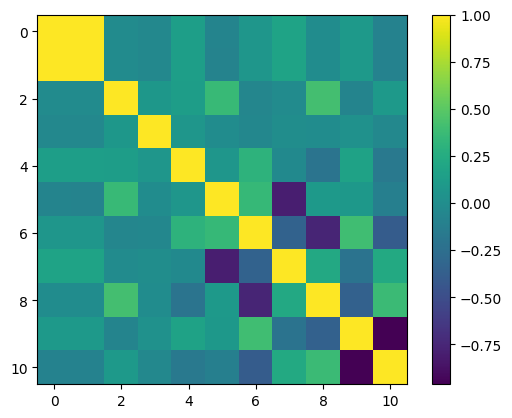

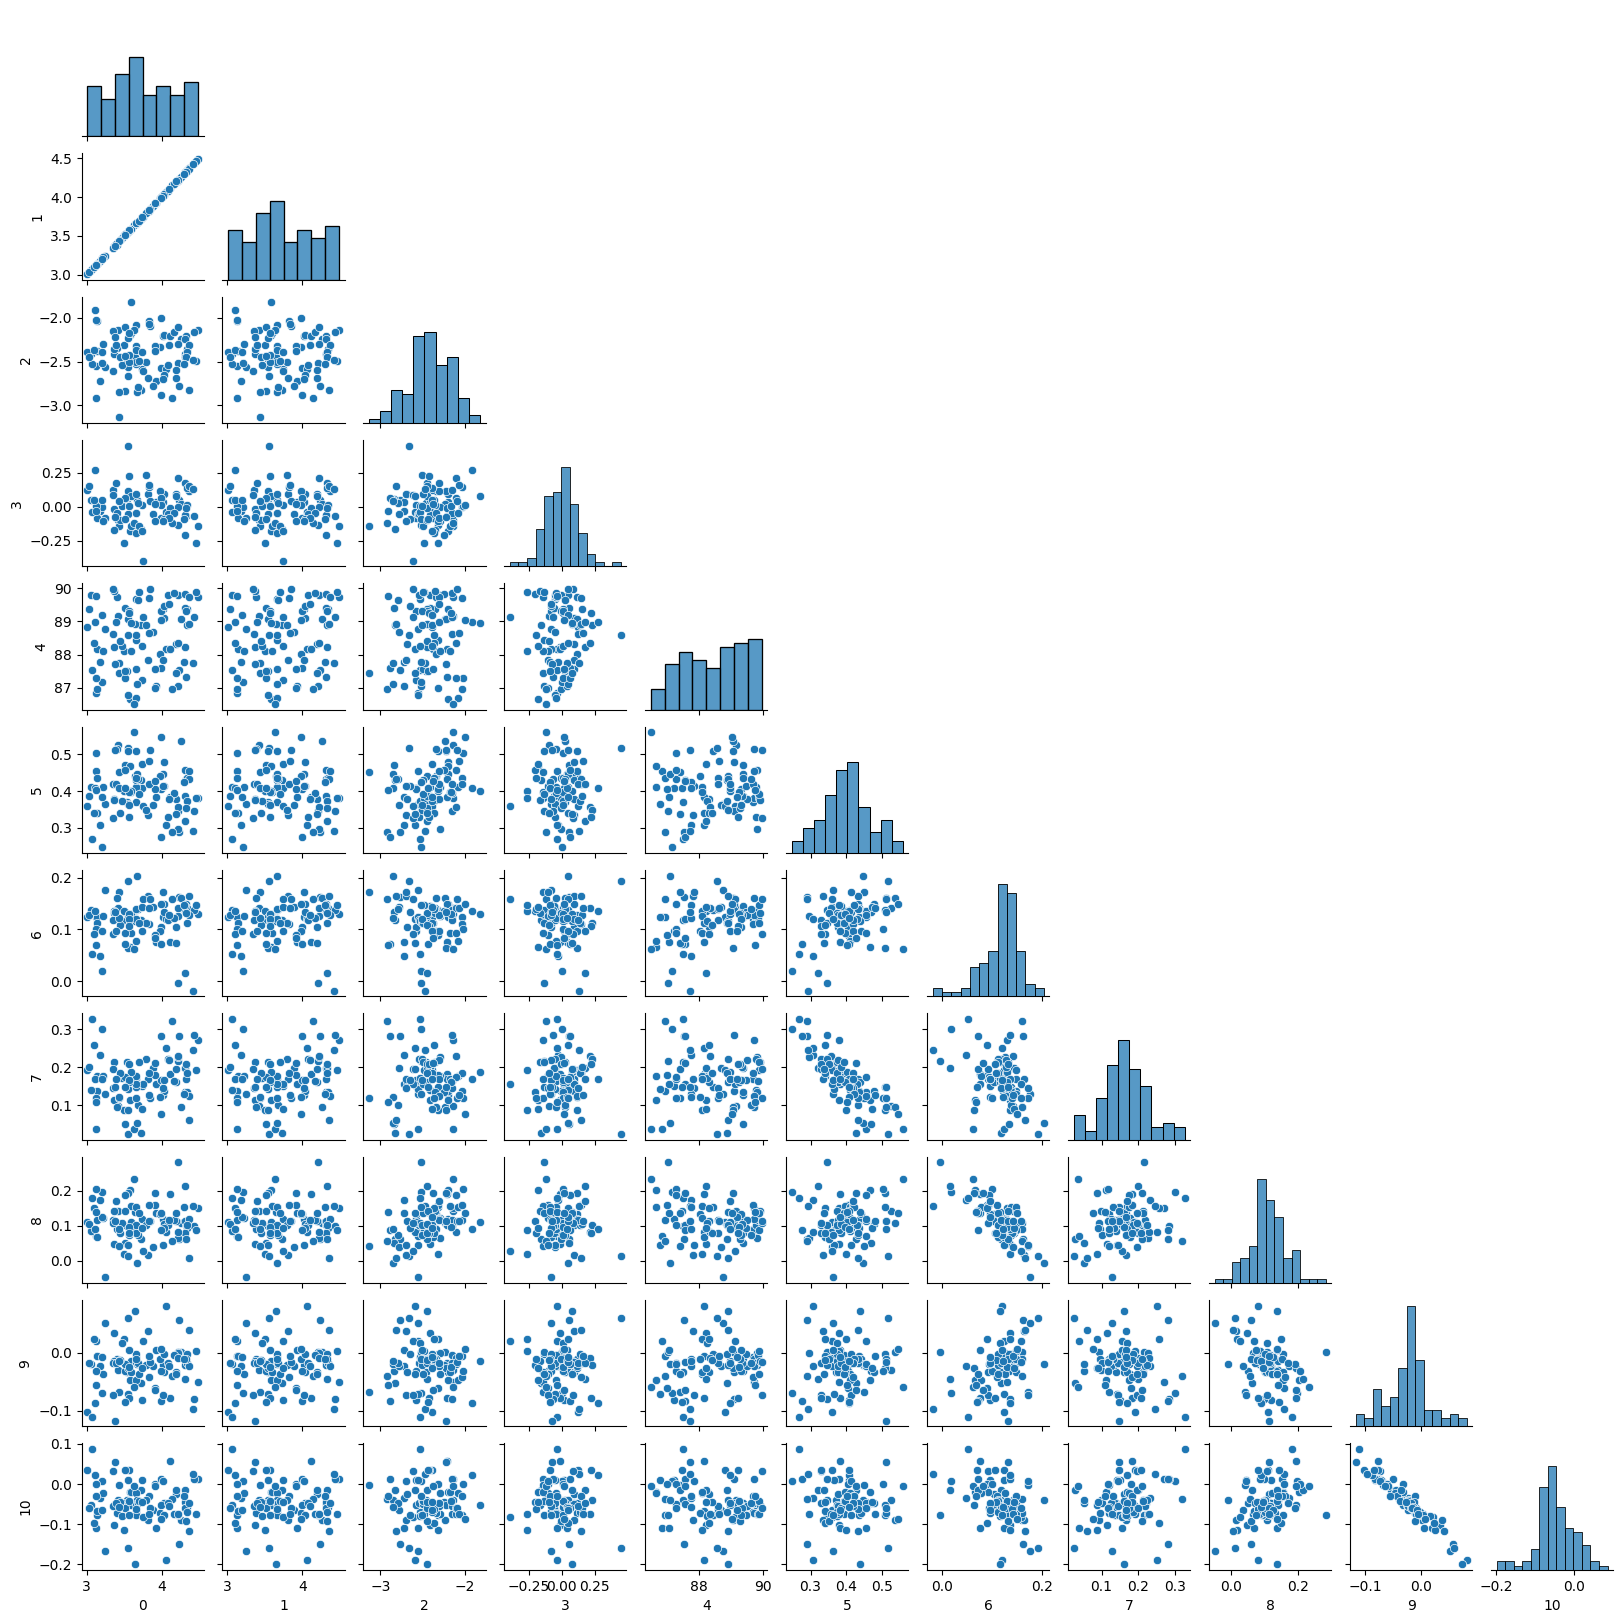

[0.41070746 0.41099692 0.25042372 0.12574439 0.97497741 0.06471388
 0.03808454 0.06191255 0.05344036 0.037833   0.0493974 ]


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:15<00:00,  1.35s/it]


local
SpawnPoolWorker-7 7
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-8 8
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-9 9
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-10 10
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-12 12
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-11 11
CUDA_VISIBLE_DEVICES= 0
(96, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


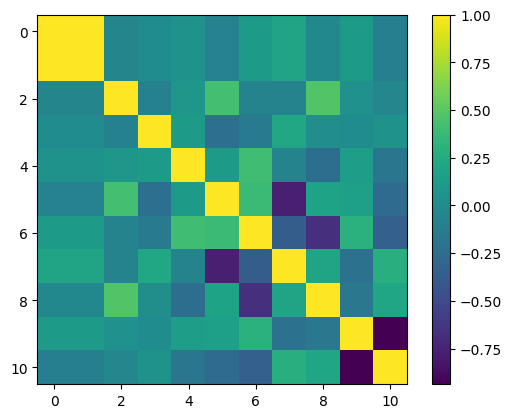

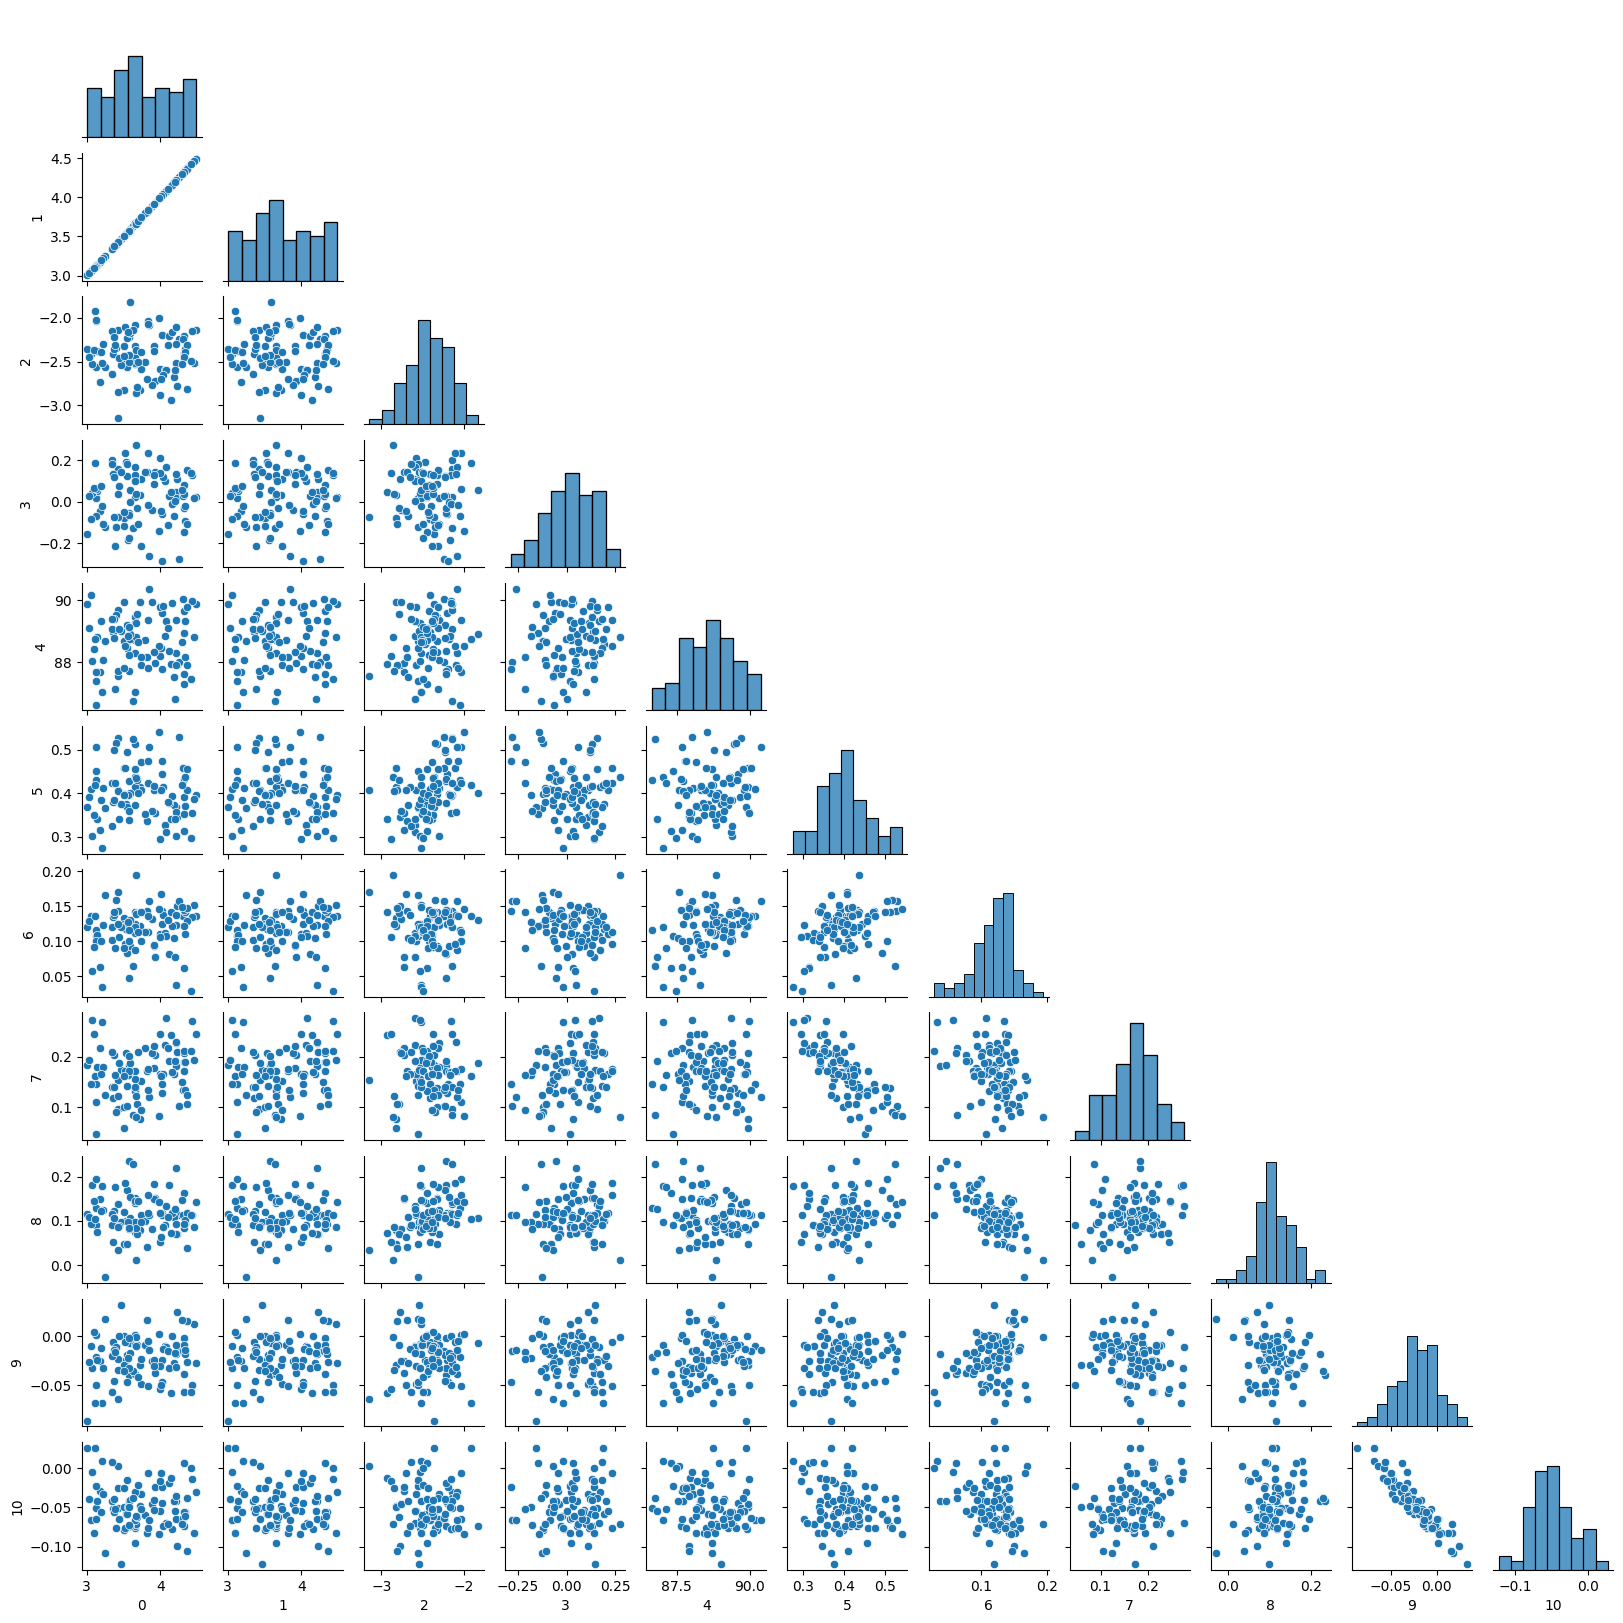

[0.41325913 0.41354695 0.24919659 0.12437323 0.86892647 0.05860506
 0.03024543 0.04943379 0.04501966 0.02211176 0.02929198]


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:15<00:00,  1.36s/it]


local
SpawnPoolWorker-16 16
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-14 14
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-17 17
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-18 18
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-13 13
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-15 15
CUDA_VISIBLE_DEVICES= 0
(96, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


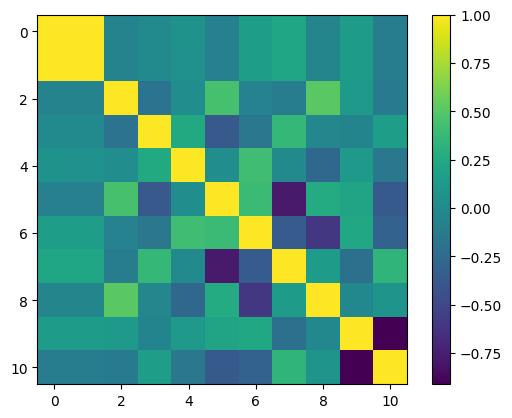

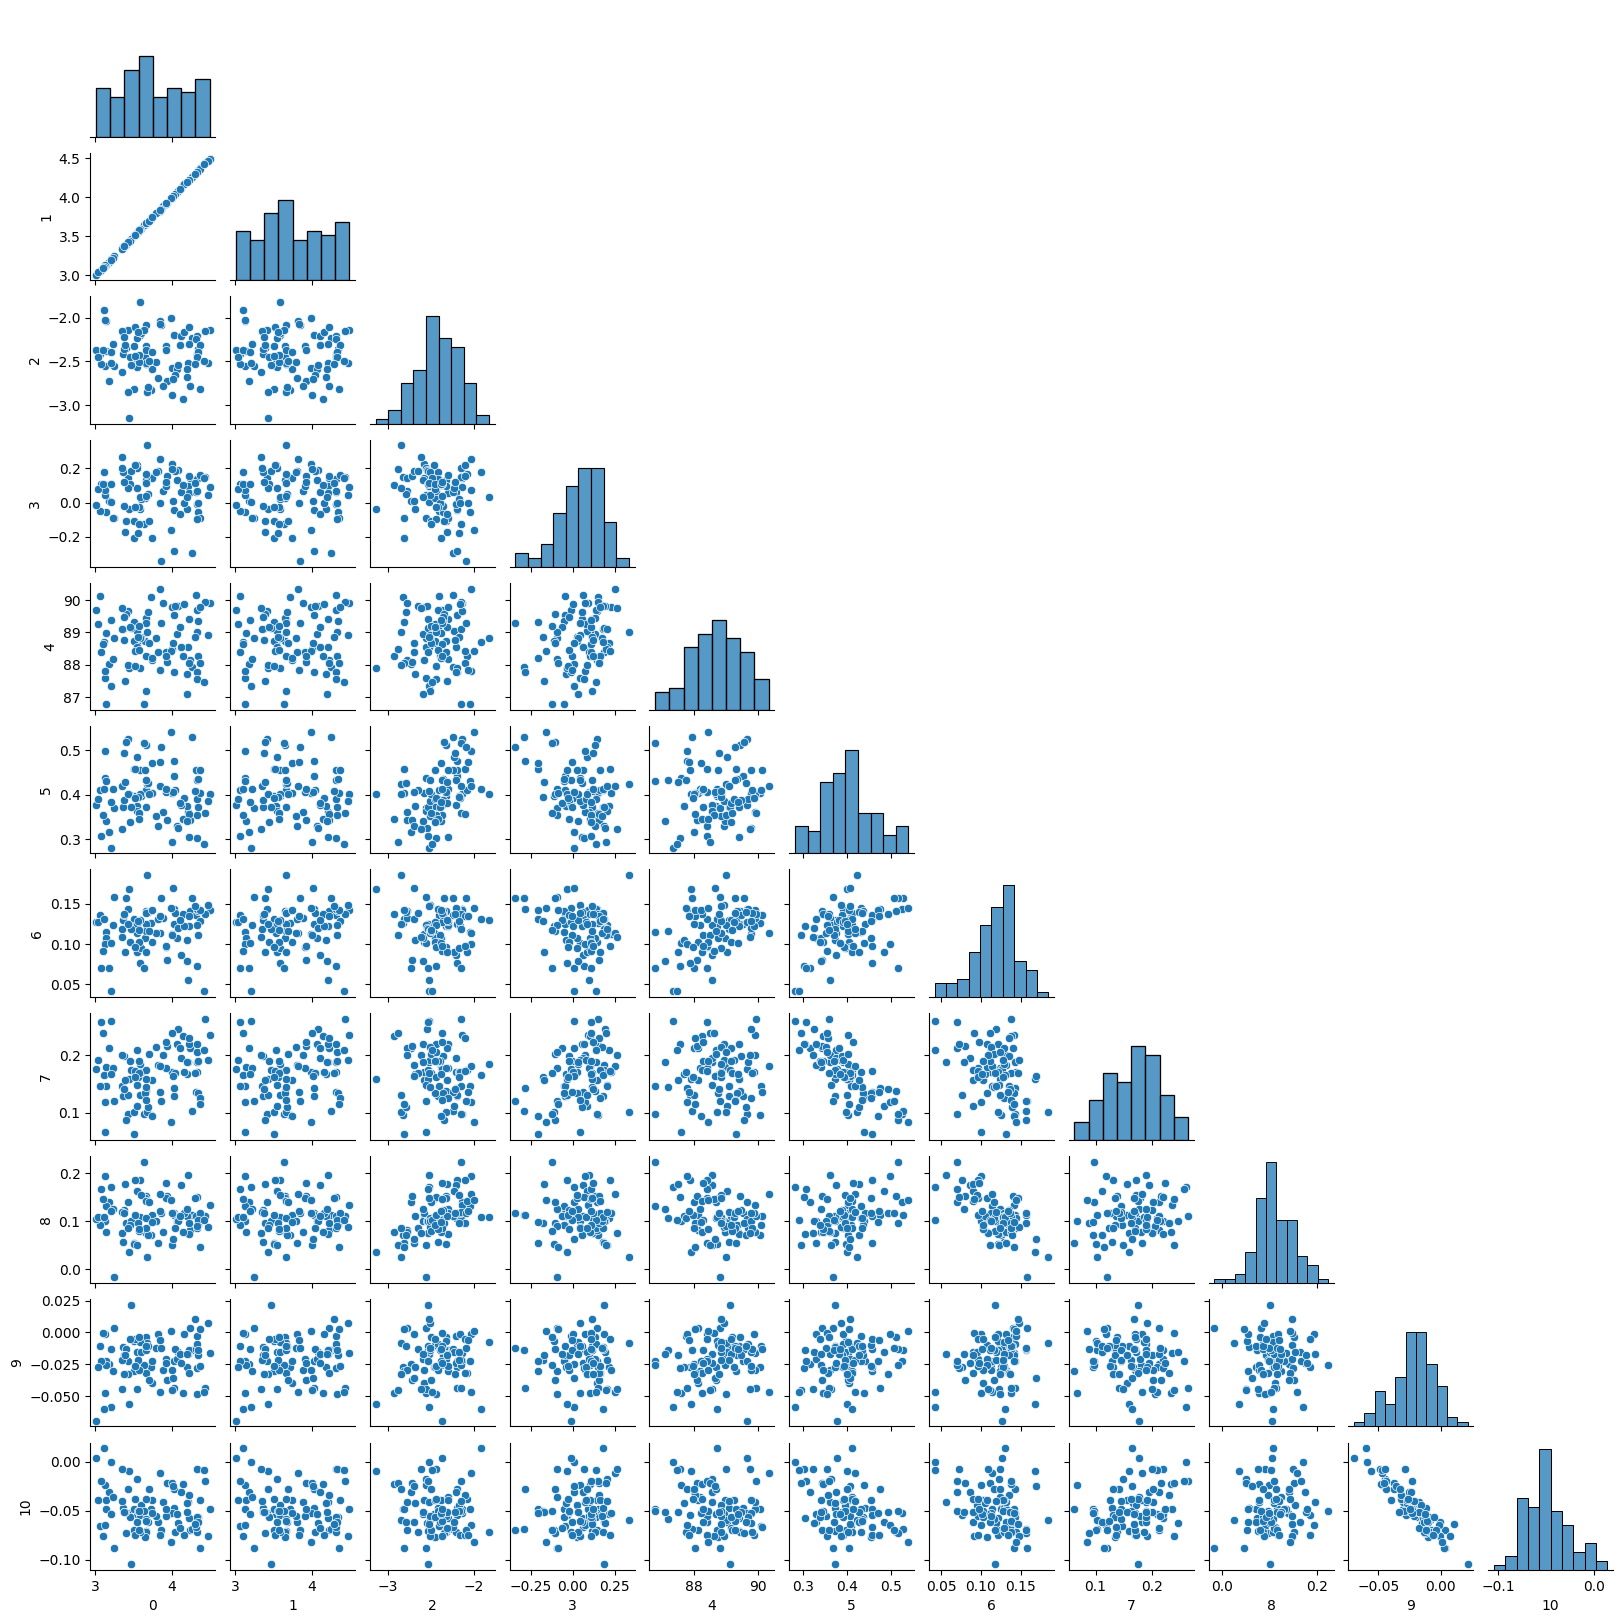

[0.41328609 0.41354712 0.24921397 0.13099047 0.81574931 0.05755992
 0.02668558 0.04543294 0.04046403 0.01664984 0.02236788]


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.33s/it]


local
SpawnPoolWorker-20 20
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-22 22
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-23 23
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-21 21
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-24 24
CUDA_VISIBLE_DEVICES= 0
(97, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


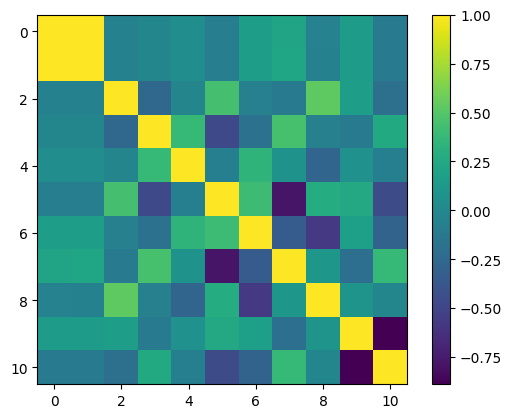

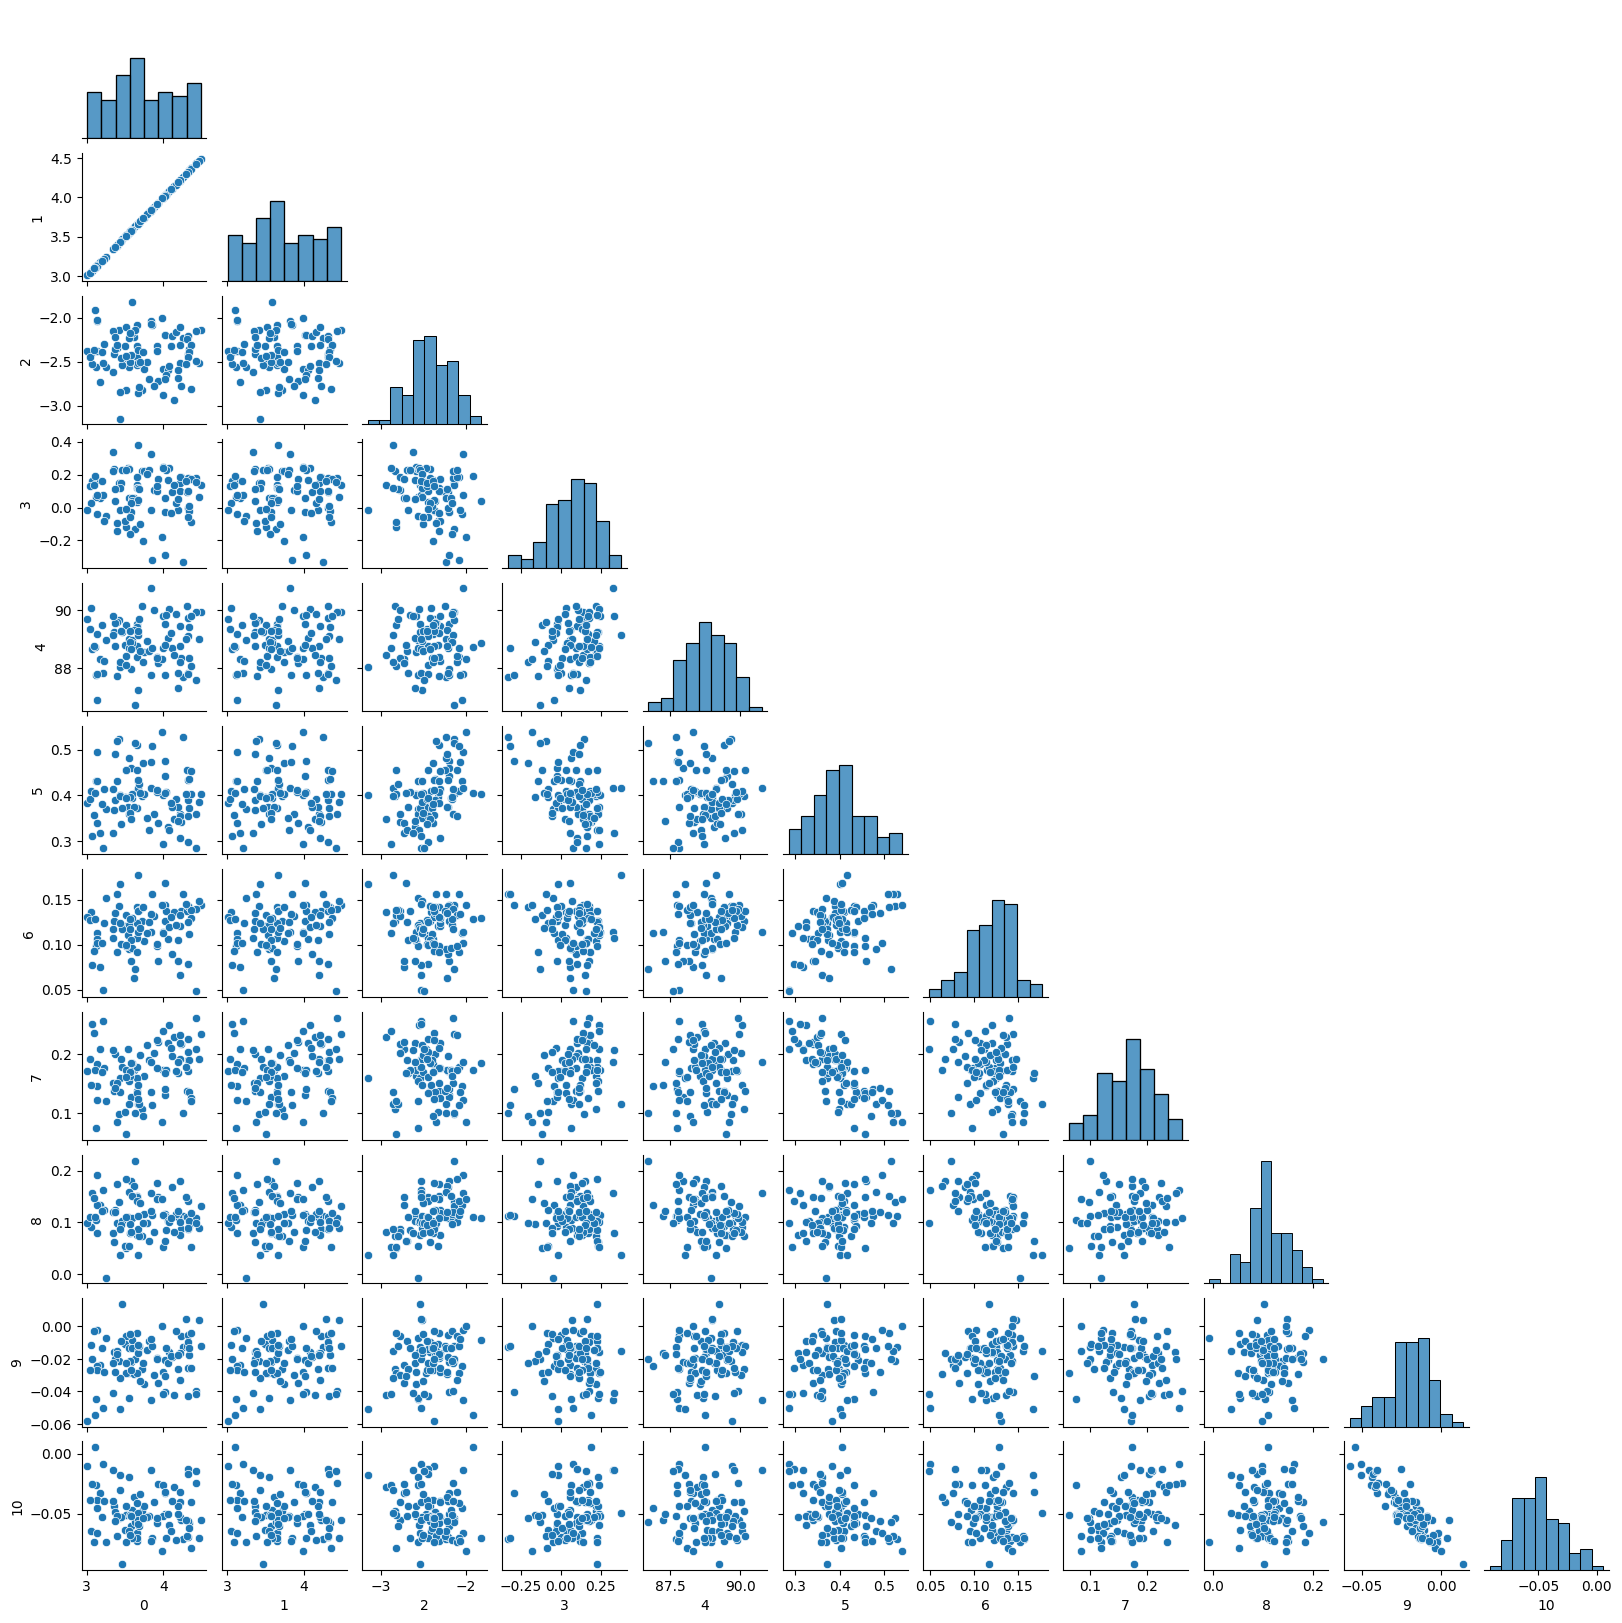

[0.41134975 0.41159305 0.24889706 0.13804092 0.79499386 0.05730866
 0.02532002 0.04398372 0.03816541 0.01377721 0.01888273]


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:14<00:00,  1.34s/it]


local
SpawnPoolWorker-29 29
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-28 28
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-30 30
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-27 27
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-26 26
CUDA_VISIBLE_DEVICES= 0
(96, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


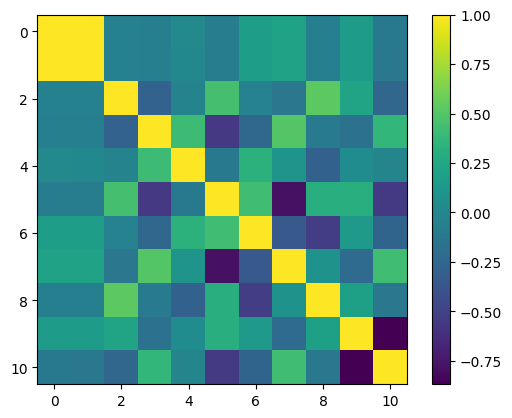

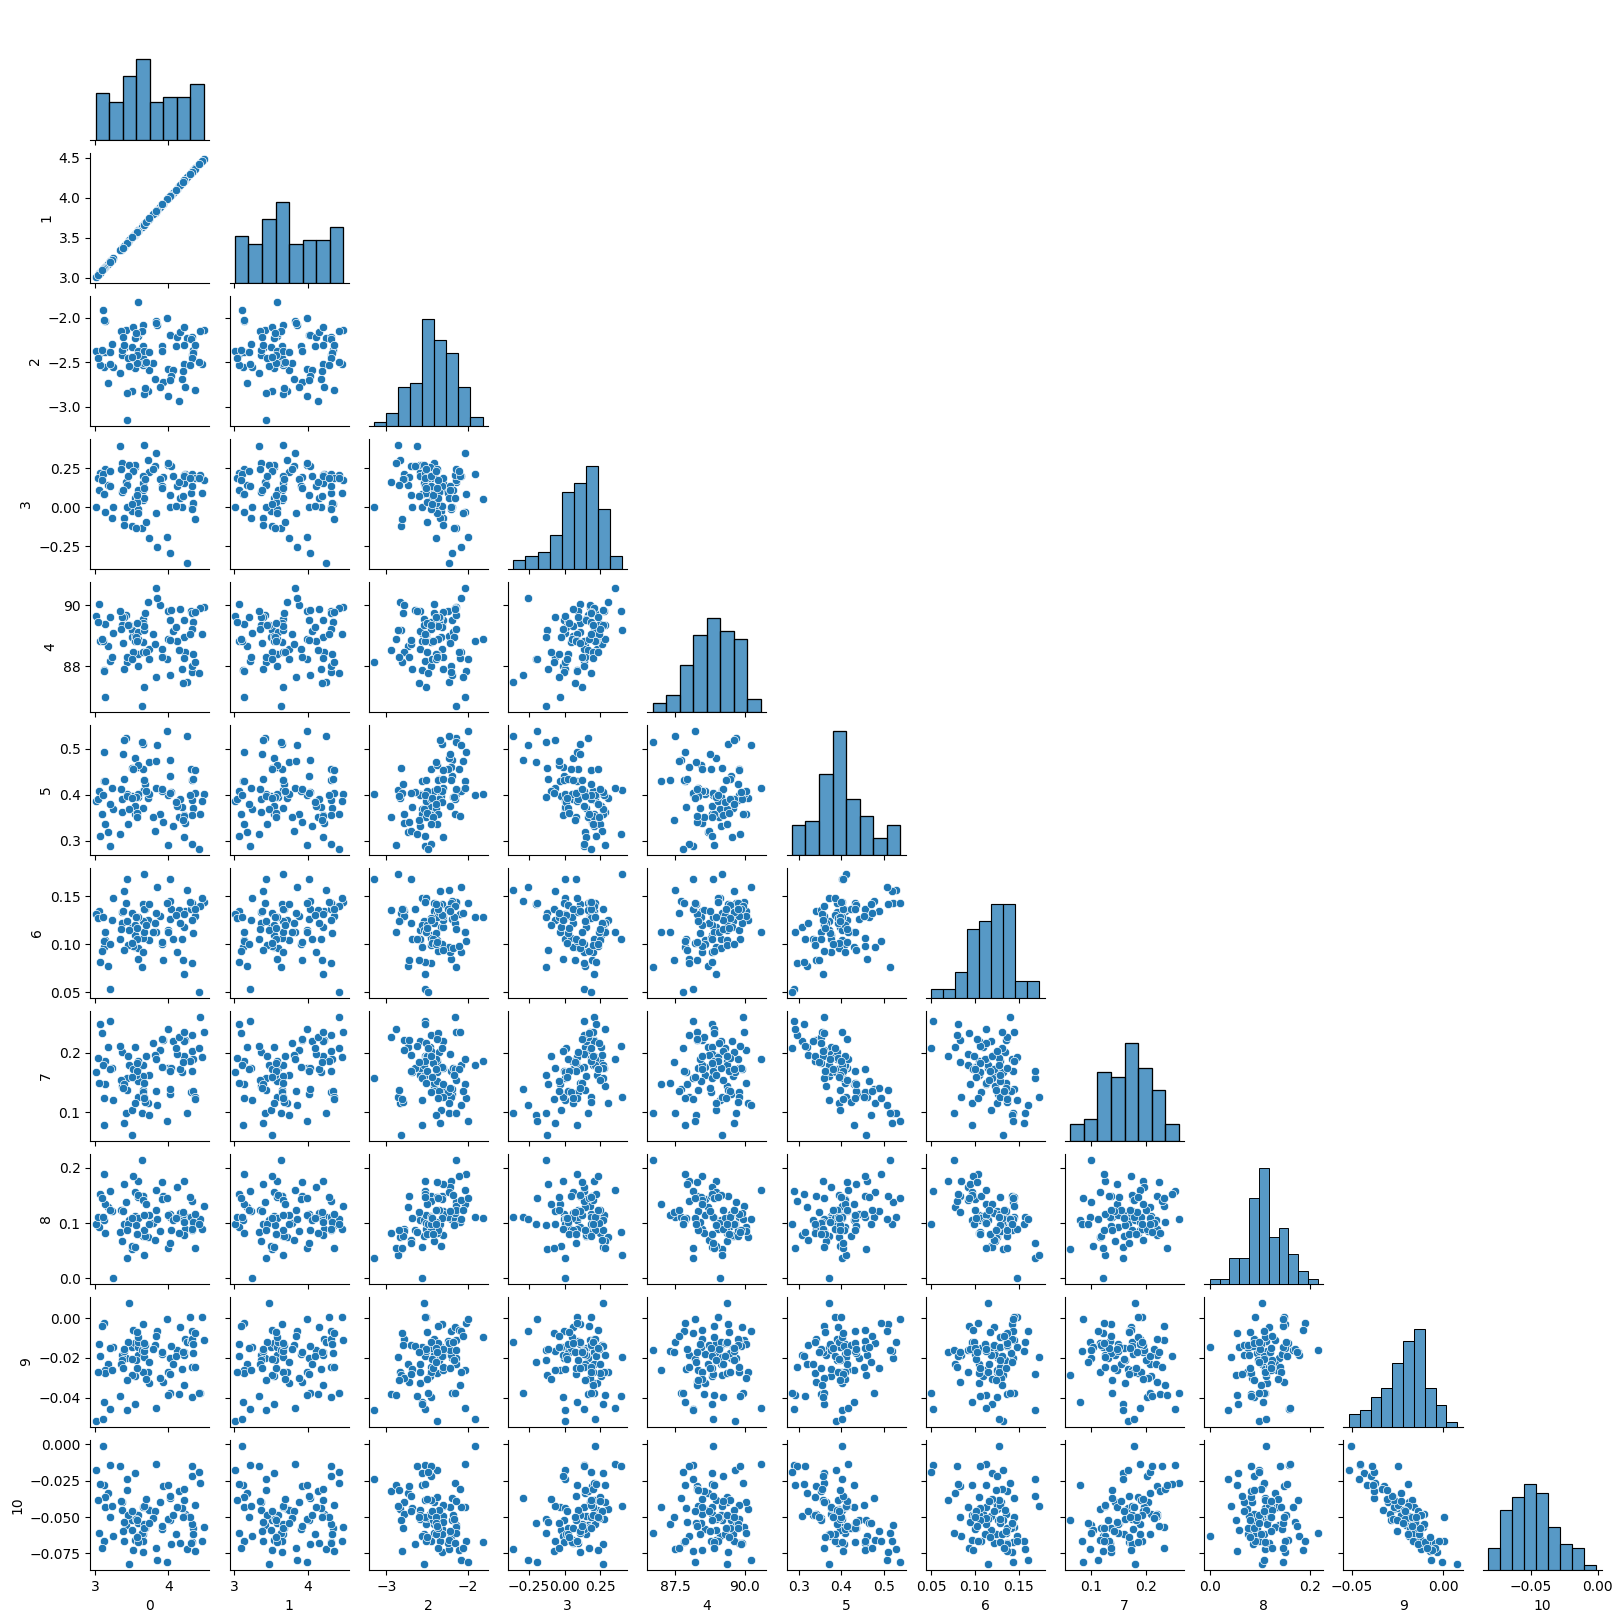

[0.41221621 0.41245124 0.24931177 0.14648274 0.77227793 0.05768656
 0.02412923 0.04314177 0.03652143 0.01218984 0.01717548]


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [26:34<00:00,  1.45s/it]


local
SpawnPoolWorker-36 36
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 94572221
New solver/alternative transit parameters fallback for planet id 1053204615
New solver/alternative transit parameters fallback for planet id 1124834224
New solver/alternative transit parameters fallback for planet id 1370040003
New solver/alternative transit parameters fallback for planet id 1834181716
New solver/alternative transit parameters fallback for planet id 2074730139
New solver/alternative transit parameters fallback for planet id 2259395627
New solver/alternative transit parameters fallback for planet id 3512283046
New solver/alternative transit parameters fallback for planet id 3653339152
New solver/alternative transit parameters fallback for planet id 3955853901
New solver/alternative transit parameters fallback for planet id 4232767776
local
SpawnPoolWorker-34 34
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet 

/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


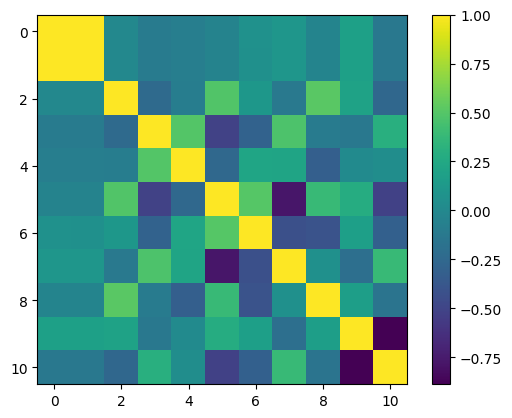

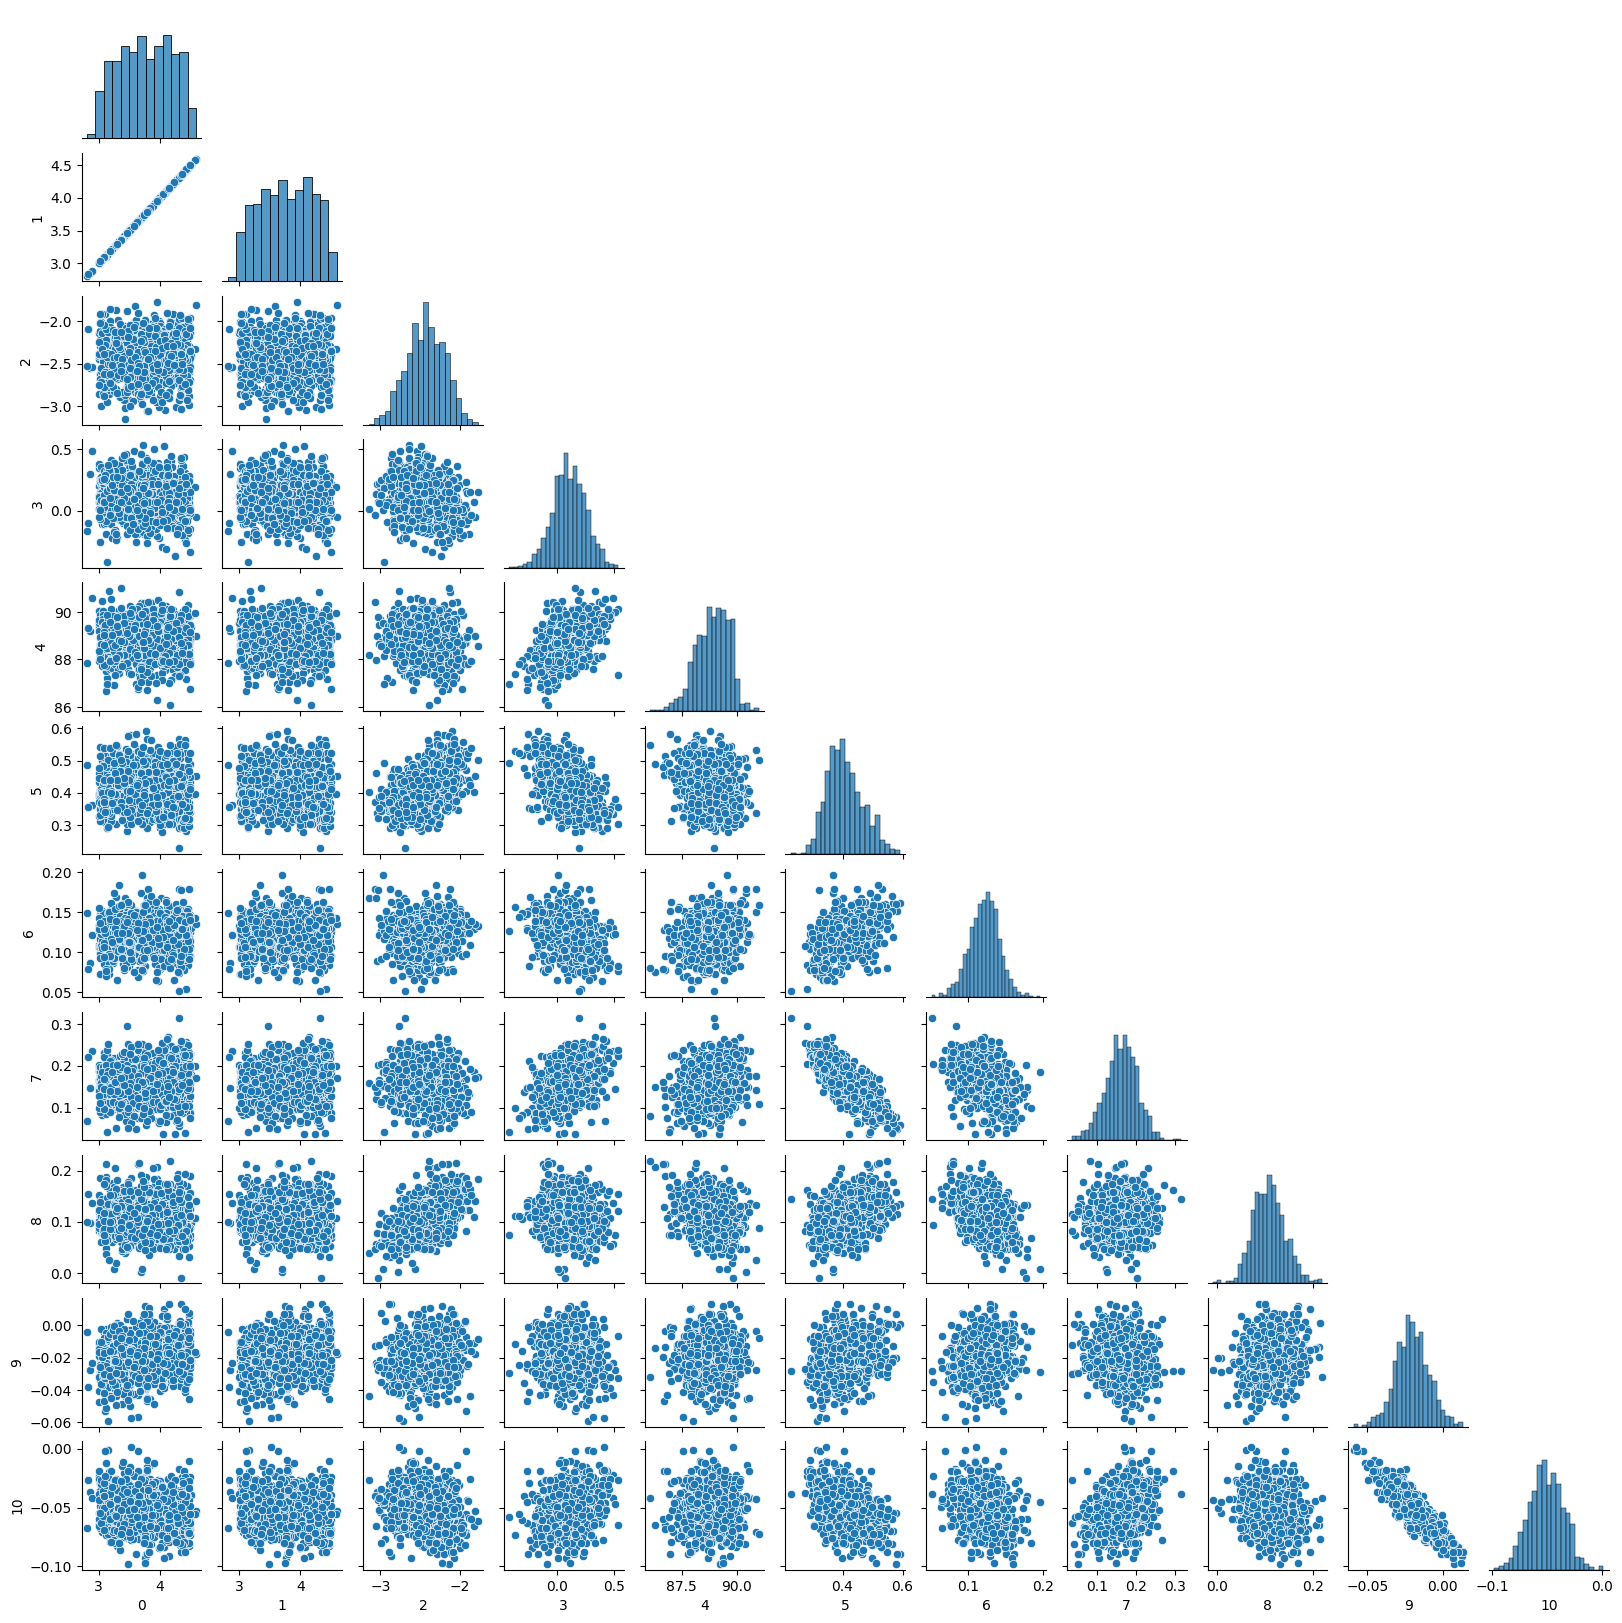

[0.42938614 0.4294469  0.23882414 0.14632684 0.74635195 0.0598572
 0.02028015 0.04134068 0.0334666  0.01116498 0.01580828]


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:30<00:00,  1.23s/it]


local
SpawnPoolWorker-41 41
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-38 38
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-40 40
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-42 42
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-39 39
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-37 37
CUDA_VISIBLE_DEVICES= 0
(909, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


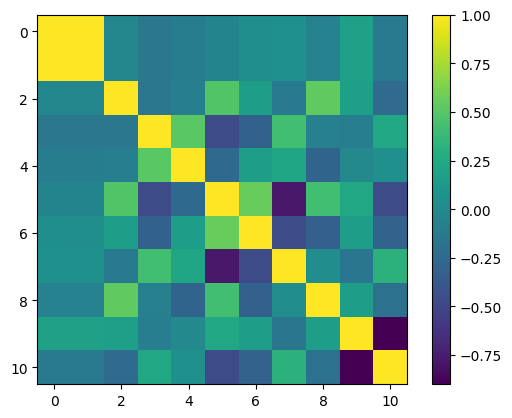

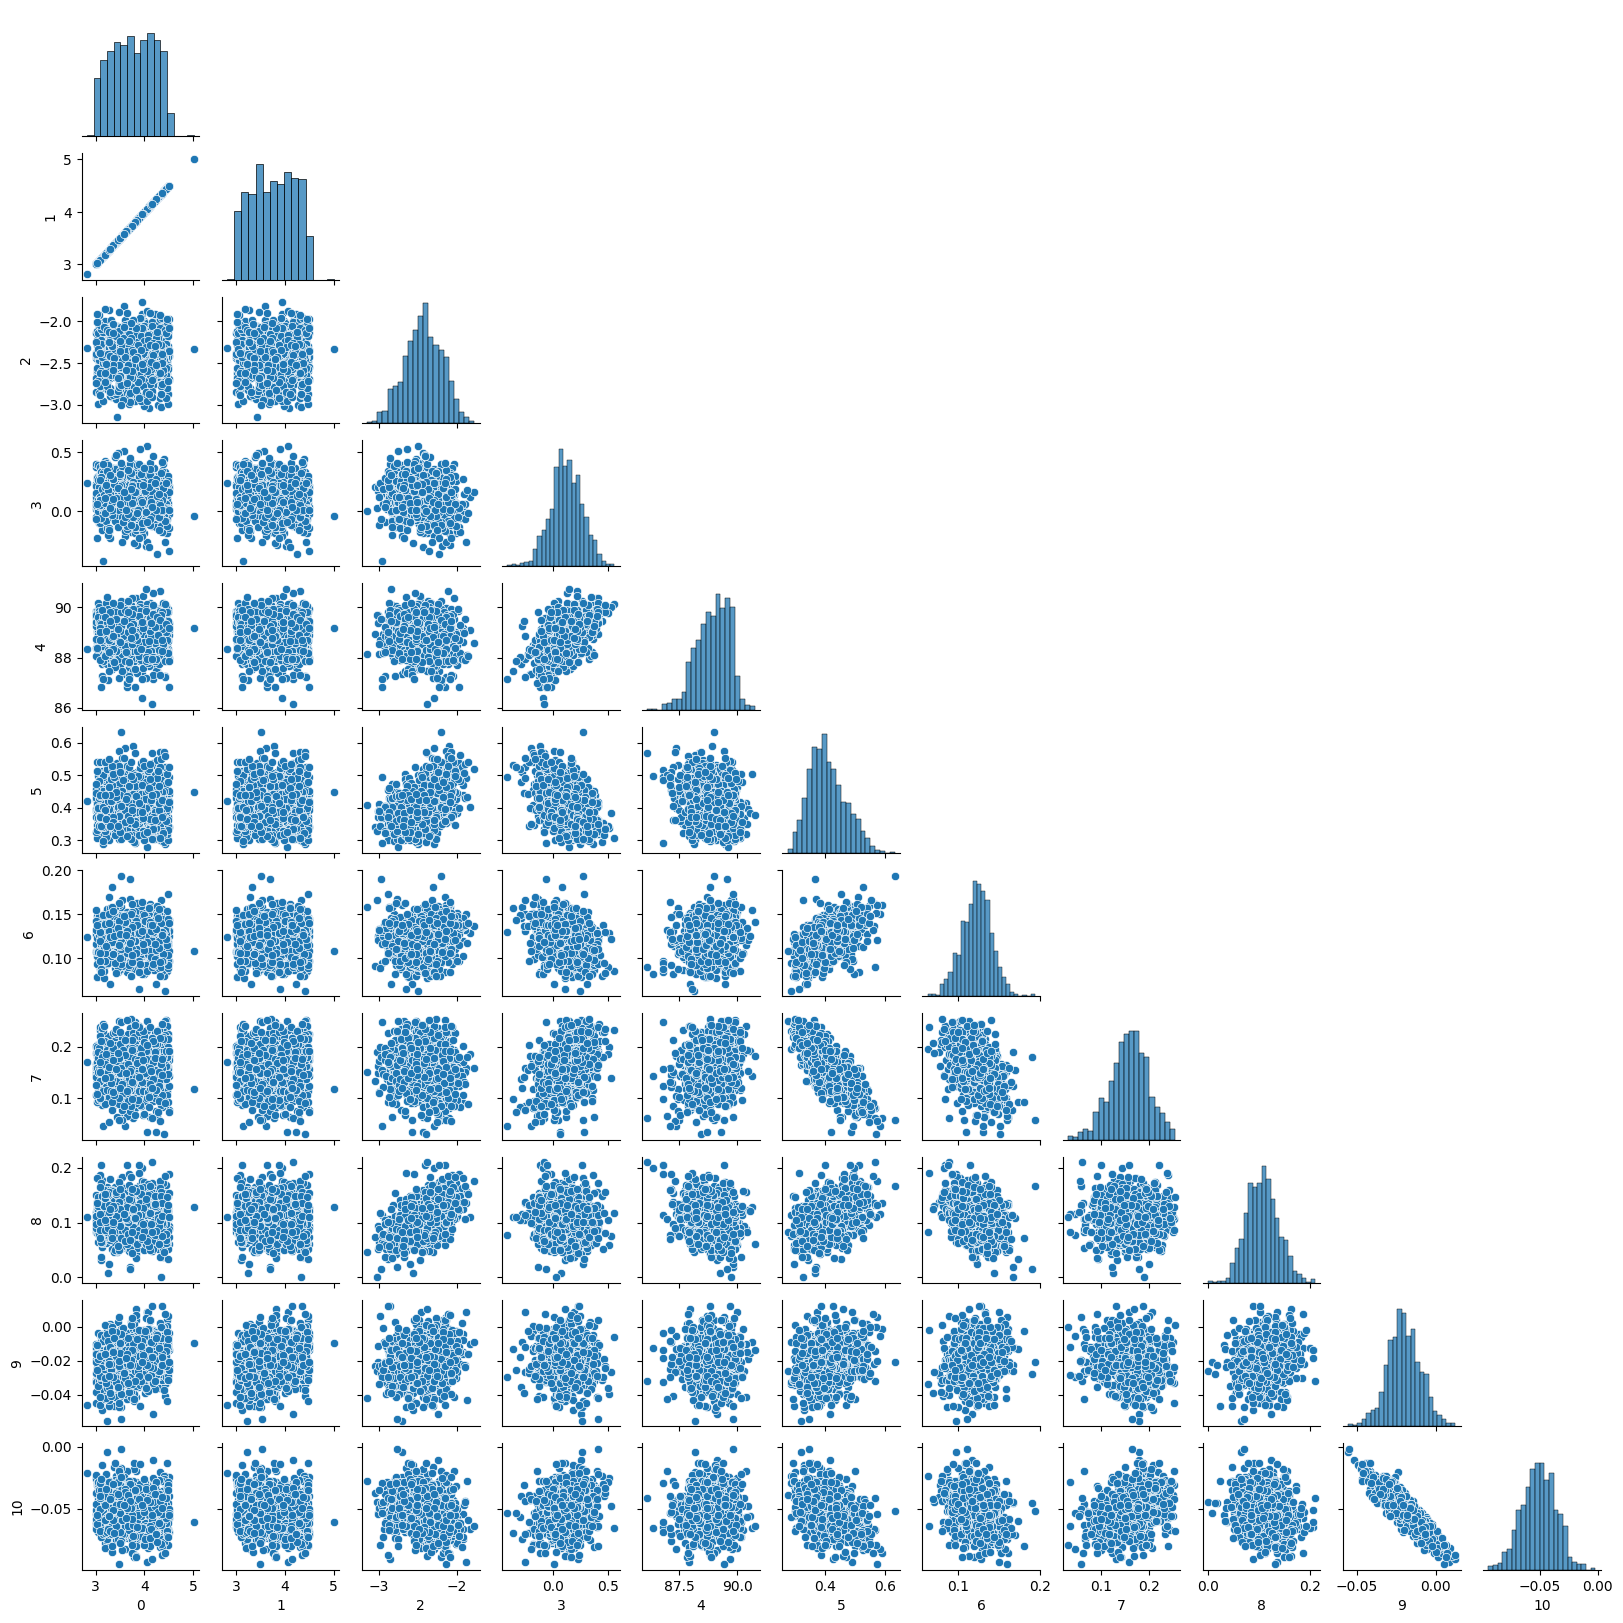

[0.42844733 0.4283745  0.23801464 0.14466967 0.70365988 0.05977051
 0.01838122 0.03959055 0.03153539 0.01053011 0.01466128]


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:54<00:00,  1.25s/it]


local
SpawnPoolWorker-47 47
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-46 46
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-44 44
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-43 43
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-45 45
CUDA_VISIBLE_DEVICES= 0
Cholesky fallback
max_eig: 7.360310924375531
trying scale: 1e-10
successful
local
SpawnPoolWorker-48 48
CUDA_VISIBLE_DEVICES= 0
(926, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


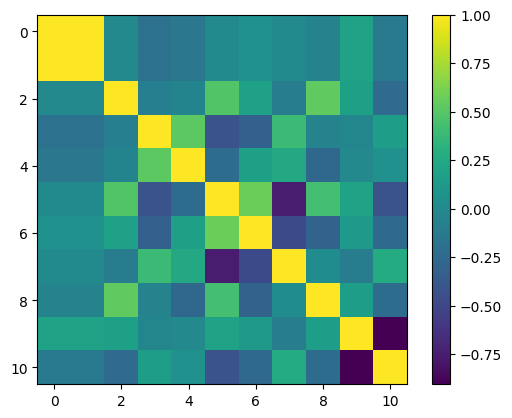

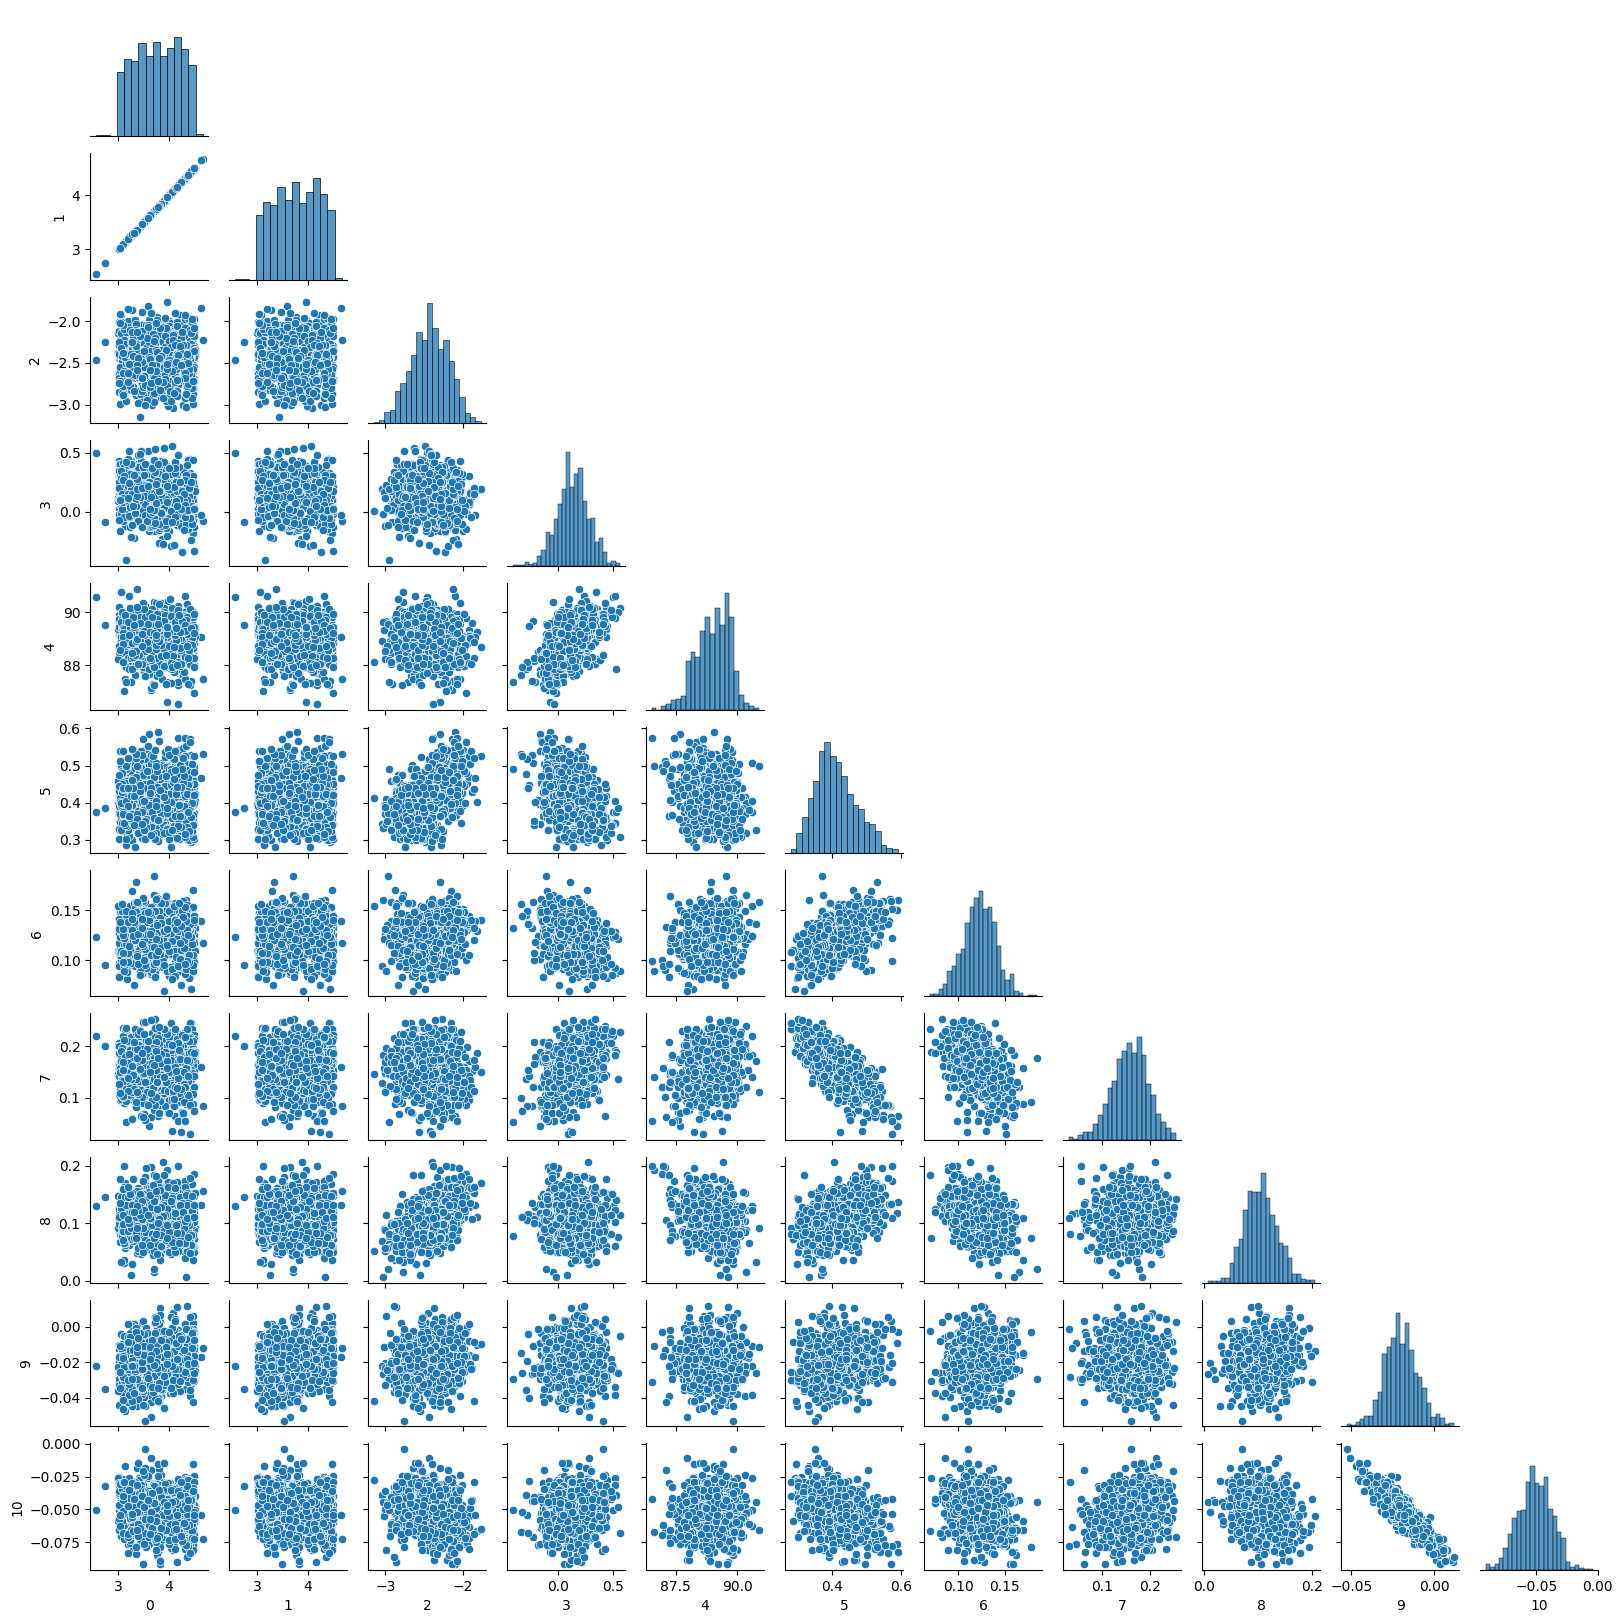

[0.43056448 0.43046463 0.23584368 0.1459042  0.68265961 0.05872491
 0.01745493 0.03812863 0.03065875 0.01000668 0.01372012]


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:54<00:00,  1.25s/it]


local
SpawnPoolWorker-54 54
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-51 51
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-50 50
CUDA_VISIBLE_DEVICES= 0
Cholesky fallback
max_eig: 8.741384476659725
trying scale: 1e-10
successful
Cholesky fallback
max_eig: 8.701833029079568
trying scale: 1e-10
successful
local
SpawnPoolWorker-49 49
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-53 53
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-52 52
CUDA_VISIBLE_DEVICES= 0
(886, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


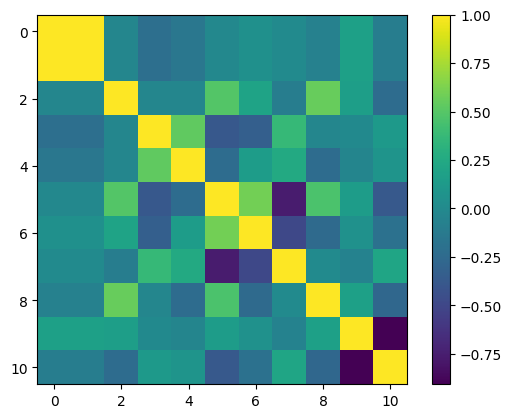

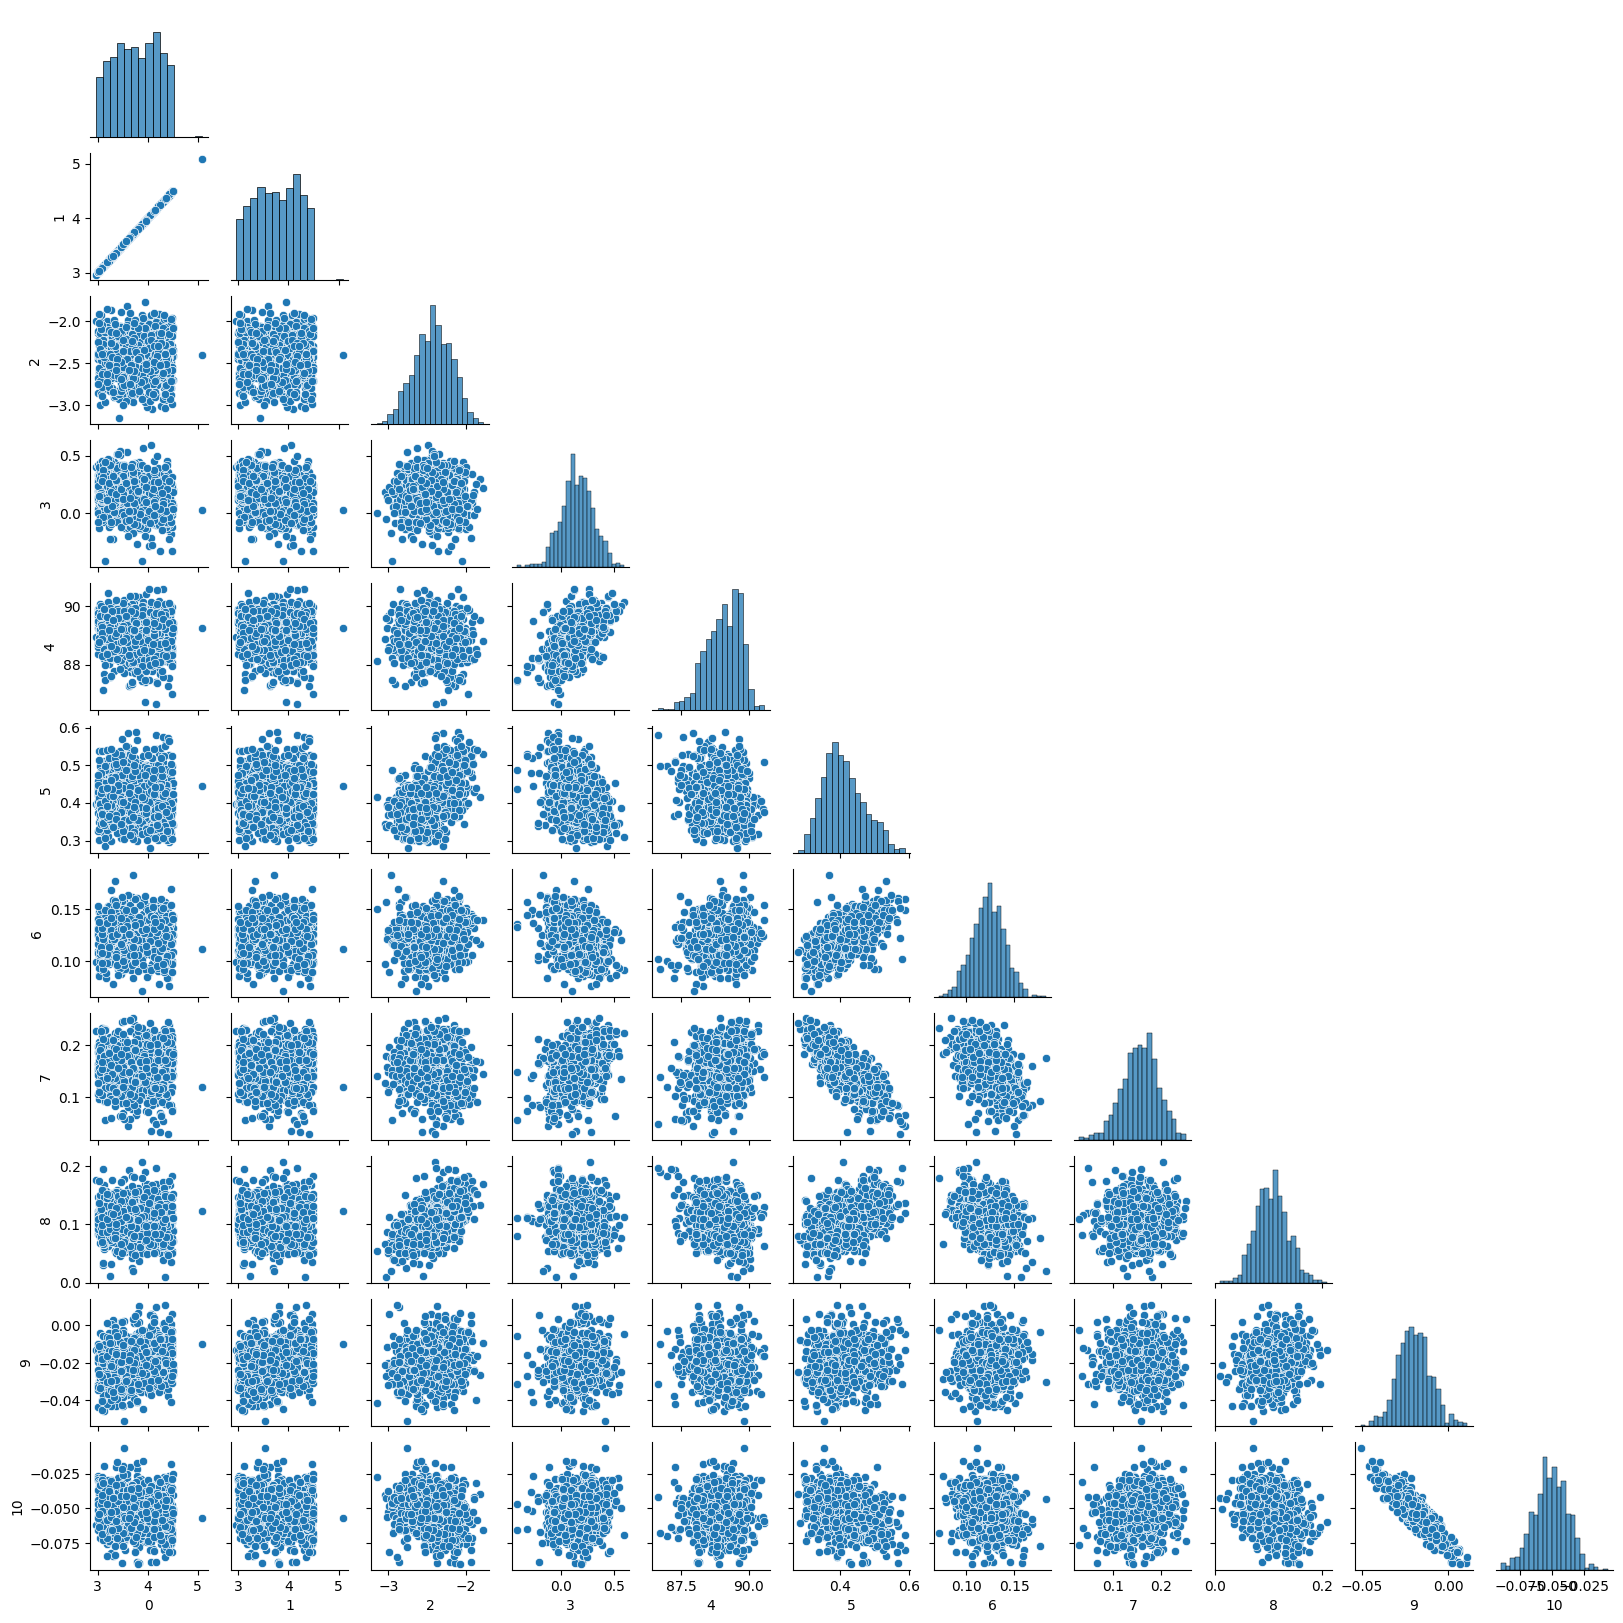

[0.43018138 0.43004255 0.23752827 0.14972179 0.64065959 0.05894714
 0.0166016  0.03759595 0.03027186 0.0095898  0.01304314]


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:42<00:00,  1.24s/it]


local
SpawnPoolWorker-59 59
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-56 56
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-55 55
CUDA_VISIBLE_DEVICES= 0
Cholesky fallback
max_eig: 8.817179156278723
trying scale: 1e-10
successful
local
SpawnPoolWorker-60 60
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-58 58
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-57 57
CUDA_VISIBLE_DEVICES= 0
Cholesky fallback
max_eig: 8.857732003346904
trying scale: 1e-10
successful
(912, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


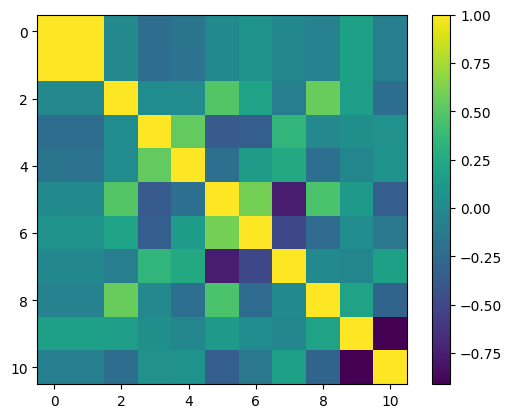

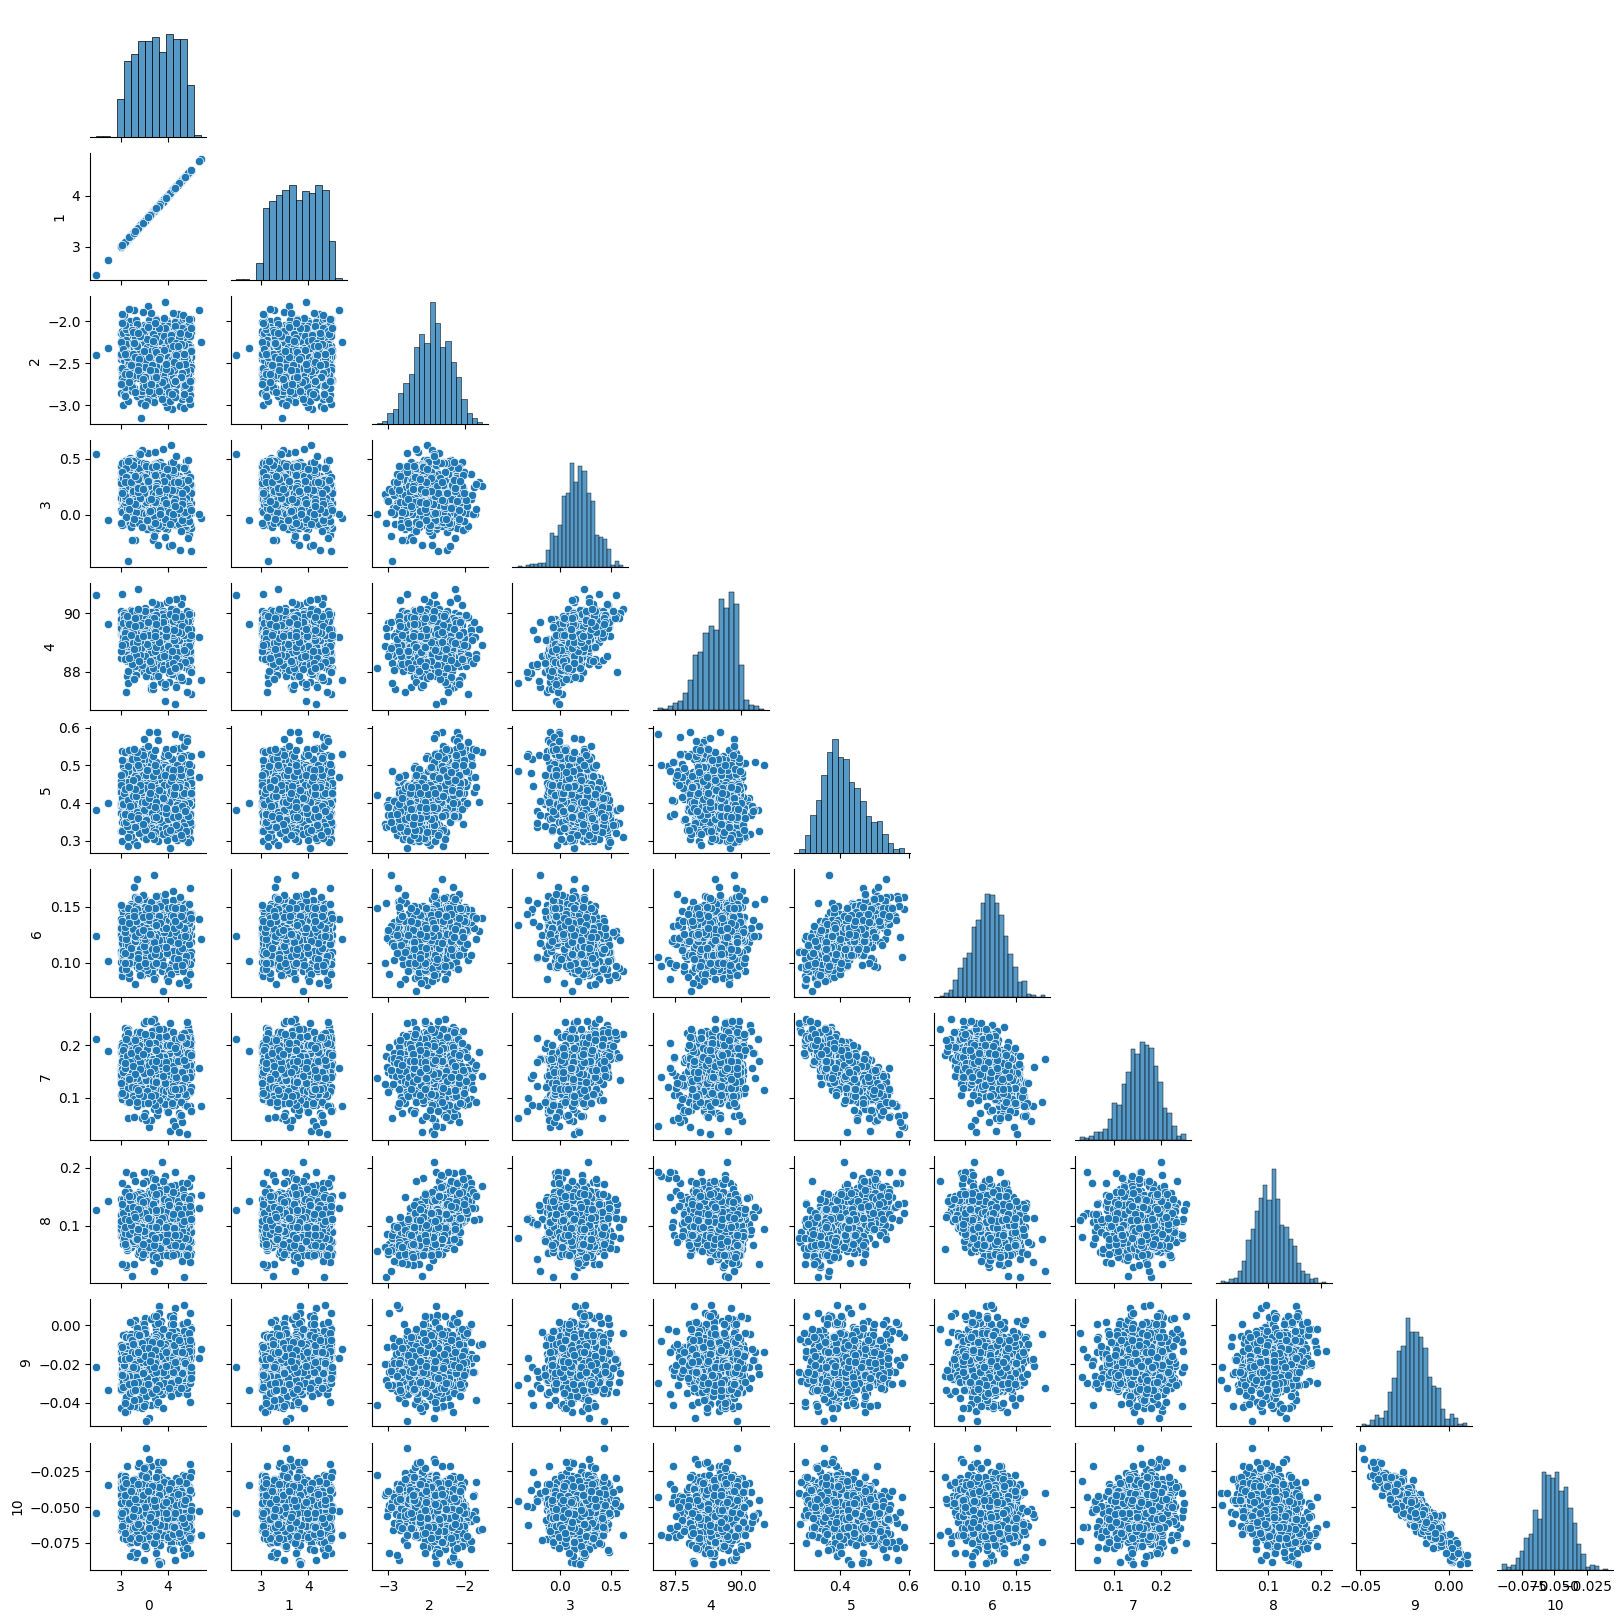

[0.43106811 0.43093255 0.23542516 0.1524846  0.61901739 0.0585085
 0.01620228 0.03692771 0.0301305  0.0093858  0.01267068]


In [8]:
for ii in range(10):
    if ii==5:
        data = copy.deepcopy(train_data2)
    data = model.infer(data)
    transit_parameters = []
    for d in data:
        d.diagnostics['starting_par'] = d.diagnostics['par_mean']
        modelr.results['model_samples'].m['signal'].set_parameters(d.diagnostics['par_samples'])
        transit_parameters.append(modelr.results['model_samples'].m['signal'].m['main'].m['transit'].get_parameters()[:,0])
    transit_parameters = np.array(transit_parameters)
    
    transit_parameters = remove_outlier(transit_parameters,4)
    print(transit_parameters.shape)

    plt.figure()
    plt.imshow(np.corrcoef(transit_parameters.T))
    plt.colorbar()
    sns.pairplot(pd.DataFrame(transit_parameters), diag_kind="hist", corner=True, height=1.5)
    plt.pause(0.0001)

    cov_est = np.cov(transit_parameters.T)
    print(np.sqrt(np.diag(cov_est)))
    mu_est = np.mean(transit_parameters,0)
    def modify_func(model, cc):
        model.m['signal'].m['main'].m['transit'].cov_override = cc[0]
        model.m['signal'].m['main'].m['transit'].mu_override = cc[1]
        # cur_params = model.m['signal'].m['main'].m['transit'].get_parameters()
        # cur_params[-model.m['signal'].m['main'].m['transit'].number_of_extra_parameters:,0] = cc[1]
        # model.m['signal'].m['main'].m['transit'].set_parameters(cur_params)
        return model
    model.model_options.modify_func = modify_func
    model.model_options.modify_func_input = [cov_est, mu_est]
    
    kgs.dill_save(kgs.temp_dir + f'transit_model_tuning{ii}.pickle', (cov_est, mu_est))

In [9]:
import subprocess

# Hibernate Windows
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/a"],  # add "/f" to force-close apps
#     check=True
# )
subprocess.run(
    ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
    check=True
)

Unable to abort the system shutdown because no shutdown was in progress.(1116)


CalledProcessError: Command '['/mnt/c/Windows/System32/shutdown.exe', '/a']' returned non-zero exit status 92.